<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/Classification_base(bankdataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This project is made to predict whether someone will agree to open a temporary deposit account in a bank 
#The analysis is run below datasets from keggle.com

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
import imblearn
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
 
 
uploaded = files.upload()

Saving bank.csv to bank.csv


In [4]:
import pandas as pd
import io


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['bank.csv']))

In [6]:
print (df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
#Descriptive statistics

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [12]:
cols = df.columns

In [13]:
#Quantitative features
num_cols = df._get_numeric_data().columns


In [14]:
#Categorical features
obj_cols = list(set(cols) - set(num_cols))

In [15]:
for col in obj_cols:
    print("{}:{}".format(col,df[col].nunique()))

housing:2
loan:2
poutcome:4
default:2
y:2
marital:3
job:12
contact:3
education:4
month:12


In [16]:
#Encode those features that take only 2 values, changing str variables to int

df.y = df.y.apply(lambda x: 1 if x=='yes' else 0)
df.default = df.default.apply(lambda x: 1 if x=='yes' else 0)
df.loan = df.loan.apply(lambda x: 1 if x=='yes' else 0)
df.housing = df.housing.apply(lambda x: 1 if x=='yes' else 0)

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [18]:
#Replace categorical features with get_dummies and remove the first feature

df = pd.get_dummies(df,drop_first=True)

In [19]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,1,0,0,0,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,-1,0,...,1,0,0,0,0,0,0,0,0,1
4517,57,1,-3313,1,1,9,153,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4518,57,0,295,0,0,19,151,11,-1,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,0,1137,0,0,6,129,4,211,3,...,0,0,0,0,0,0,0,1,0,0


In [20]:
#We add one features that says that the client has never been contacted

df['pdays_bool'] = df.pdays.apply(lambda x: 1 if x==-1 else 0)

In [21]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,pdays_bool
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,1,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,0,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,1,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,-1,0,...,0,0,0,0,0,0,0,0,1,1
4517,57,1,-3313,1,1,9,153,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
4518,57,0,295,0,0,19,151,11,-1,0,...,0,0,0,0,0,0,0,0,1,1
4519,28,0,1137,0,0,6,129,4,211,3,...,0,0,0,0,0,0,1,0,0,0


In [22]:
#Split into X and y

X = df.loc[:, df.columns != 'y']
y = df.y

In [23]:
#Doing undersampling (random non-repetitive sampling from the majority class)

undersample = imblearn.under_sampling.RandomUnderSampler(random_state=42)
X, y = undersample.fit_resample(X, y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [26]:
#Calculation of the ROC curve and the area under it

def compute_ROC(y_test,y_score):
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    return fpr,tpr,roc_auc


#Plotting the ROC curve

def ROC_plot(fpr,tpr,roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve')
    plt.legend(loc="lower right")
    plt.show()

In [28]:
#SVC
parameters = {'degree':[2,3], 'C':[1,5,10]}
svc = SVC(random_state=42)
clf_svc = GridSearchCV(svc, parameters,n_jobs=-1)
clf_svc.fit(X_train, y_train)
print(clf_svc.best_params_)

{'C': 10, 'degree': 2}


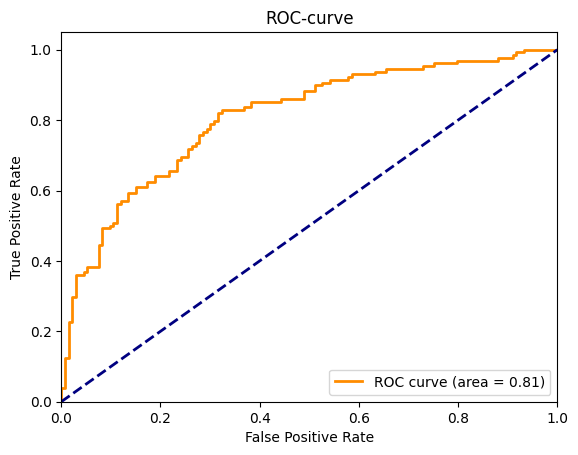

In [29]:
#Calculate fpr,tpr,roc_auc

y_score = clf_svc.decision_function(X_test)
fpr,tpr,roc_auc = compute_ROC(y_test,y_score)


#ROC curve

ROC_plot(fpr,tpr,roc_auc)

In [30]:
#LogisticRegression
parameters = {'penalty':['l1', 'l2'], 'C':[1,5,10]}
lr = LogisticRegression(random_state=42)
clf_lr = GridSearchCV(lr, parameters,n_jobs=-1)
clf_lr.fit(X_train, y_train)
print (clf_lr.best_params_)

{'C': 10, 'penalty': 'l2'}


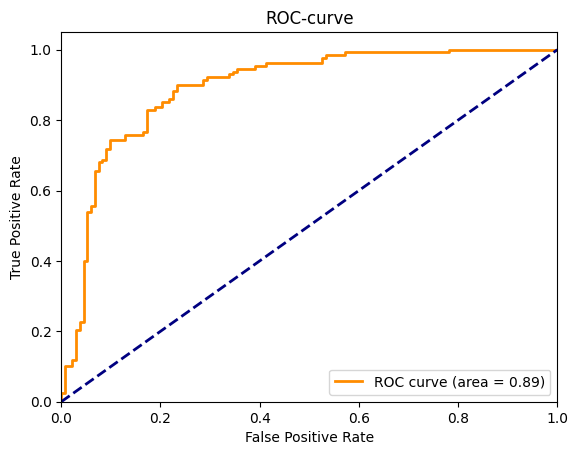

In [31]:
#Calculate fpr,tpr,roc_auc

y_score = clf_lr.decision_function(X_test)
fpr,tpr,roc_auc = compute_ROC(y_test,y_score)


#ROC curve
ROC_plot(fpr,tpr,roc_auc)

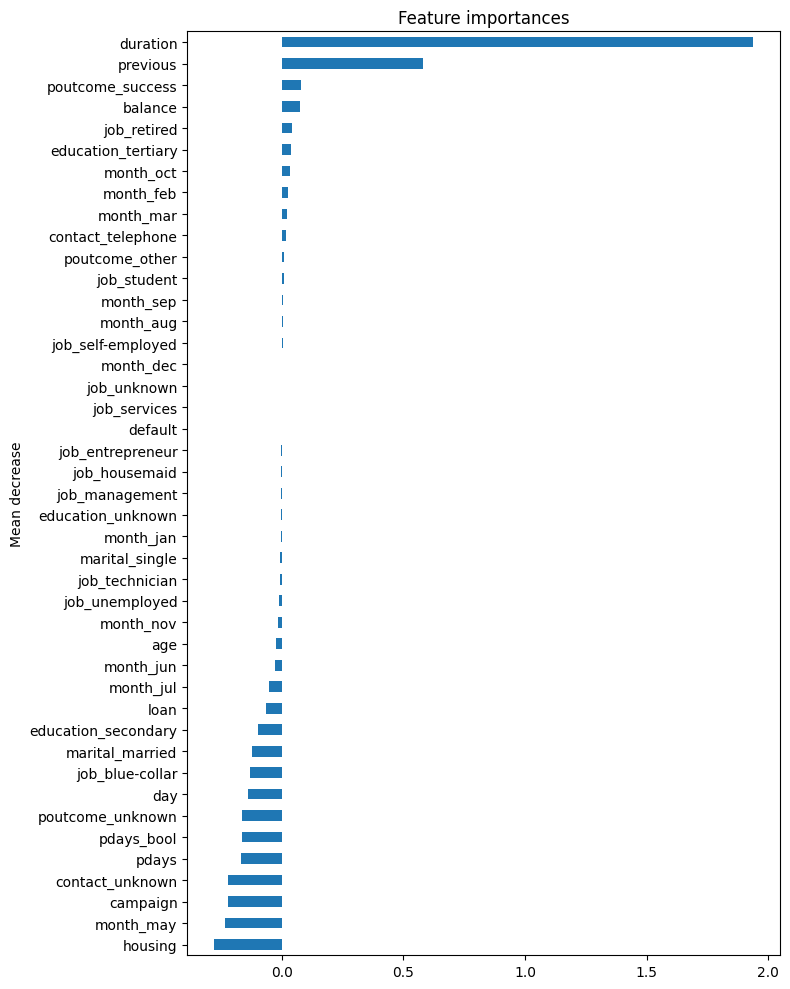

In [32]:
importances = np.std(X, 0)*clf_lr.best_estimator_.coef_[0]
lr_importances = pd.Series(importances, index=X.columns)


#Sorting

lr_importances = lr_importances.sort_values(ascending=True)


#Display the graph

fig, ax = plt.subplots(figsize=(8,10))
lr_importances.plot.barh(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease")
fig.tight_layout()
plt.show()

In [33]:
#GradientBoostingClassifier
parameters = {'subsample':[0.5,1], 'learning_rate':[0.05,0.1,0.2]}
gb = GradientBoostingClassifier(random_state=42)
clf_gb = GridSearchCV(gb, parameters,n_jobs=-1)
clf_gb.fit(X_train, y_train)
print (clf_gb.best_params_)

{'learning_rate': 0.1, 'subsample': 1}


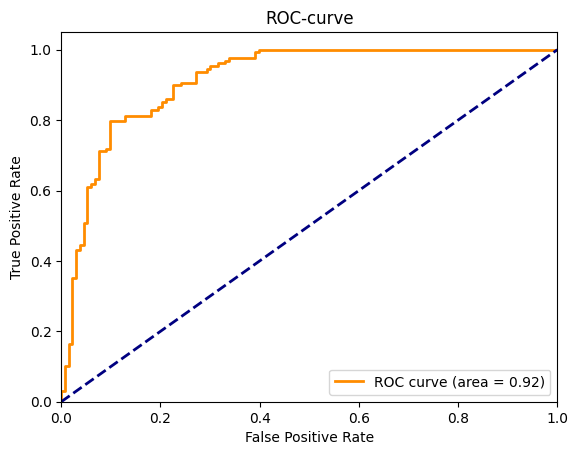

In [34]:
#Calculate fpr,tpr,roc_auc

y_score = clf_gb.decision_function(X_test)
fpr,tpr,roc_auc = compute_ROC(y_test,y_score)


#ROC curve

ROC_plot(fpr,tpr,roc_auc)

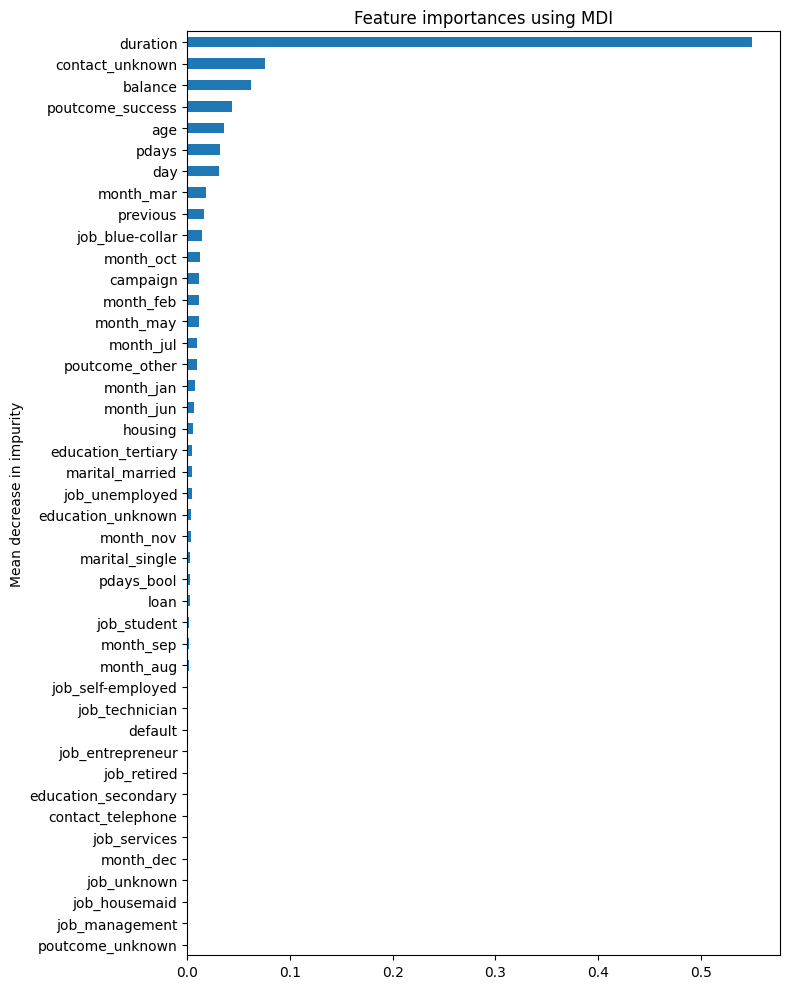

In [35]:
#Get the importances of features and convert to Series

importances = clf_gb.best_estimator_.feature_importances_
importances = pd.Series(importances, index=X.columns)


#Sorting
importances = importances.sort_values(ascending=True)


#Display the graph

fig, ax = plt.subplots(figsize=(8,10))
importances.plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [36]:
#RandomForestClassifier
parameters = {'criterion':['gini', 'entropy'], 'n_estimators':[10,50,100]}
rf = RandomForestClassifier(random_state=42)
clf_rf = GridSearchCV(rf, parameters,n_jobs=-1)
clf_rf.fit(X_train, y_train)
print (clf_rf.best_params_)

{'criterion': 'gini', 'n_estimators': 100}


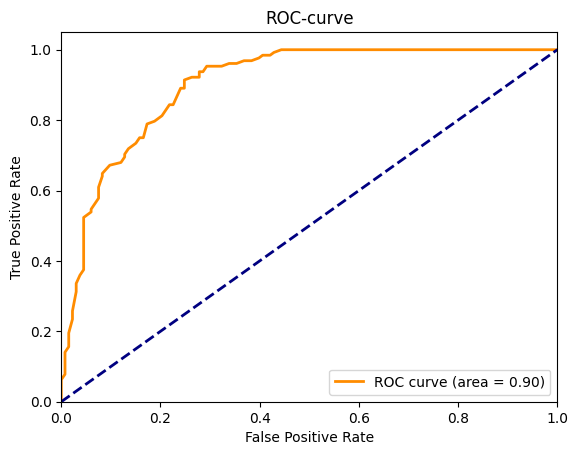

In [37]:

#Calculate fpr,tpr,roc_auc

y_score = clf_rf.predict_proba(X_test)[:,1]
fpr,tpr,roc_auc = compute_ROC(y_test,y_score)


#ROC curve

ROC_plot(fpr,tpr,roc_auc)

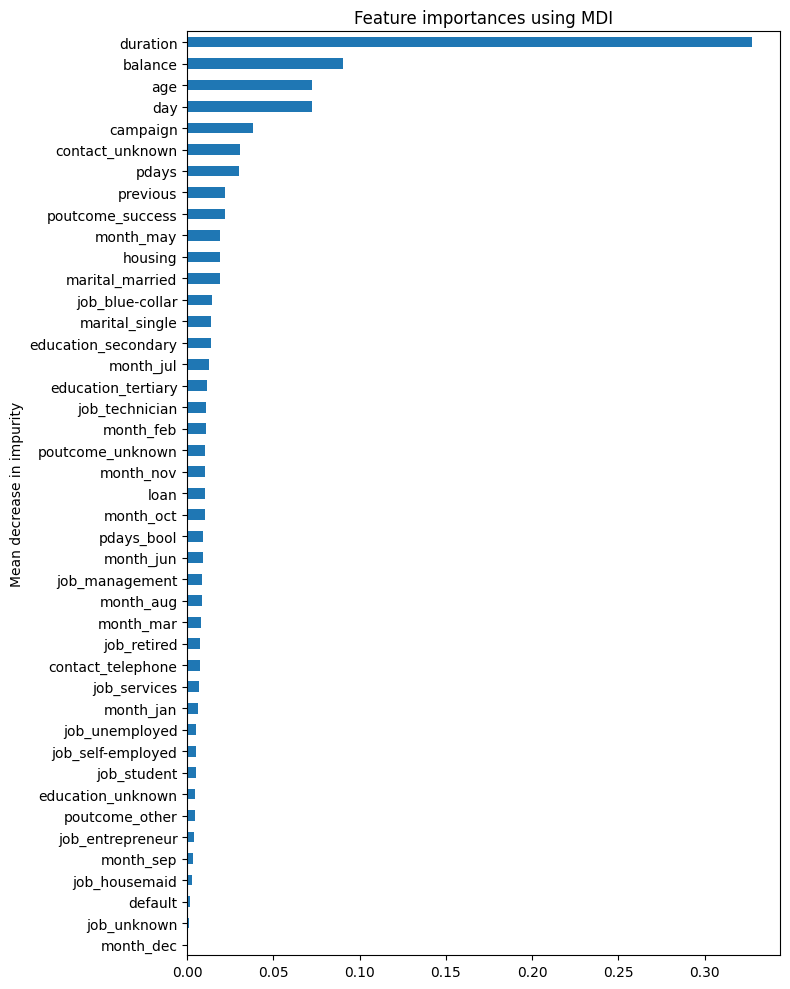

In [38]:

#Get the importances of features and convert to Series

importances = clf_rf.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)


#Sorting
forest_importances = forest_importances.sort_values(ascending=True)


#Display the graph
fig, ax = plt.subplots(figsize=(8,10))
forest_importances.plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [40]:

#Calculation of the ROC curve
def compute_ROC_fixed(y_test,y_score):
    
    fpr = []
    tpr = []
    
    for i in range(1,100):
        threshold = i/100
        pred = [1 if i>=threshold else 0 for i in y_score]
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
        fpr.append(fp/(fp+tn))
        tpr.append(tp/(tp+fn))

    return fpr,tpr

In [41]:
#We will split the sample into 4 splits
skf = StratifiedKFold(n_splits=4)

#Вспомогательные словари для сохранения резуьтатов тестирования
##Auxiliary dictionaries for saving test results
accs = {
    'SVC':[],
    'LogisticRegression':[],
    'GradientBoosting':[],
    'RandomForest':[]
}

importanies_dict = {
    'LogisticRegression':[],
    'GradientBoosting':[],
    'RandomForest':[]
}

FPR = {
    'SVC':[],
    'LogisticRegression':[],
    'GradientBoosting':[],
    'RandomForest':[]
}

TPR = {
    'SVC':[],
    'LogisticRegression':[],
    'GradientBoosting':[],
    'RandomForest':[]
}

#Перебираем все варианты разбиения
#Going through all the splitting options
for train_index, test_index in skf.split(X, y):
    X_train_kfold, X_test_kfold = X.values[train_index], X.values[test_index]
    y_train_kfold, y_test_kfold = y[train_index], y[test_index]
    
    #SVC
    svc = SVC(random_state=42)
    #Устанавливаем подобранные параметры
    #Setting the selected parameters
    svc.set_params(**clf_svc.best_params_)
    svc.fit(X_train_kfold,y_train_kfold)
    #Считаем точность
    #Counting accuracy
    prediction = svc.predict(X_test_kfold)
    acc = accuracy_score(y_test_kfold, prediction)
    accs['SVC'].append(acc)
    #ROC
    y_score = svc.decision_function(X_test_kfold)
    fpr,tpr,_ = compute_ROC(y_test_kfold,y_score)
    FPR['SVC'].append(fpr)
    TPR['SVC'].append(tpr)
    
    #LogisticRegression
    lr = LogisticRegression(random_state=42)
    #Устанавливаем подобранные параметры
    #Setting the selected parameters
    lr.set_params(**clf_lr.best_params_)
    lr.fit(X_train_kfold,y_train_kfold)
    #Считаем точность
    #Counting accuracy
    prediction = lr.predict(X_test_kfold)
    acc = accuracy_score(y_test_kfold, prediction)
    accs['LogisticRegression'].append(acc)
    importanies_dict['LogisticRegression'].append((np.std(X, 0)*lr.coef_[0]).values)
    #ROC
    y_score = lr.decision_function(X_test_kfold)
    fpr,tpr,_ = compute_ROC(y_test_kfold,y_score)
    FPR['LogisticRegression'].append(fpr)
    TPR['LogisticRegression'].append(tpr)
    
    #GradientBoostingClassifier
    gb = GradientBoostingClassifier(random_state=42)
    #Устанавливаем подобранные параметры
    #Setting the selected parameters
    gb.set_params(**clf_gb.best_params_)
    gb.fit(X_train_kfold,y_train_kfold)
    #Считаем точность
    #Counting accuracy
    prediction = gb.predict(X_test_kfold)
    acc = accuracy_score(y_test_kfold, prediction)
    accs['GradientBoosting'].append(acc)
    importanies_dict['GradientBoosting'].append(gb.feature_importances_)
    #ROC
    y_score = gb.decision_function(X_test_kfold)
    fpr,tpr,_ = compute_ROC(y_test_kfold,y_score)
    FPR['GradientBoosting'].append(fpr)
    TPR['GradientBoosting'].append(tpr)
    
    #RandomForestClassifier
    rf = RandomForestClassifier(random_state=42)
    #Устанавливаем подобранные параметры
    #Setting the selected parameters
    rf.set_params(**clf_rf.best_params_)
    rf.fit(X_train_kfold,y_train_kfold)
    #Считаем точность
    #Counting accuracy
    prediction = rf.predict(X_test_kfold)
    acc = accuracy_score(y_test_kfold, prediction)
    accs['RandomForest'].append(acc)
    importanies_dict['RandomForest'].append(rf.feature_importances_)
    #ROC
    y_score = clf_rf.predict_proba(X_test_kfold)[:,1]
    fpr,tpr,_ = compute_ROC(y_test_kfold,y_score)
    FPR['RandomForest'].append(fpr)
    TPR['RandomForest'].append(tpr)

In [42]:
results = pd.DataFrame(accs)
results.loc[results.shape[0]+1,:]=results.mean()
results = results.set_index(pd.Index(['Fold1','Fold2','Fold3','Fold4','Mean']))
results

,SVC,LogisticRegression,GradientBoosting,RandomForest
Fold1,0.712644,0.762452,0.785441,0.812261
Fold2,0.750958,0.773946,0.846743,0.839080
Fold3,0.734615,0.780769,0.819231,0.830769
Fold4,0.792308,0.803846,0.830769,0.815385
Mean,0.747631,0.780253,0.820546,0.824374


In [43]:
importanies_dict = {k:np.vstack(v) for k,v in importanies_dict.items()}
importanies_dict = {k:np.mean(v,axis=0) for k,v in importanies_dict.items()}

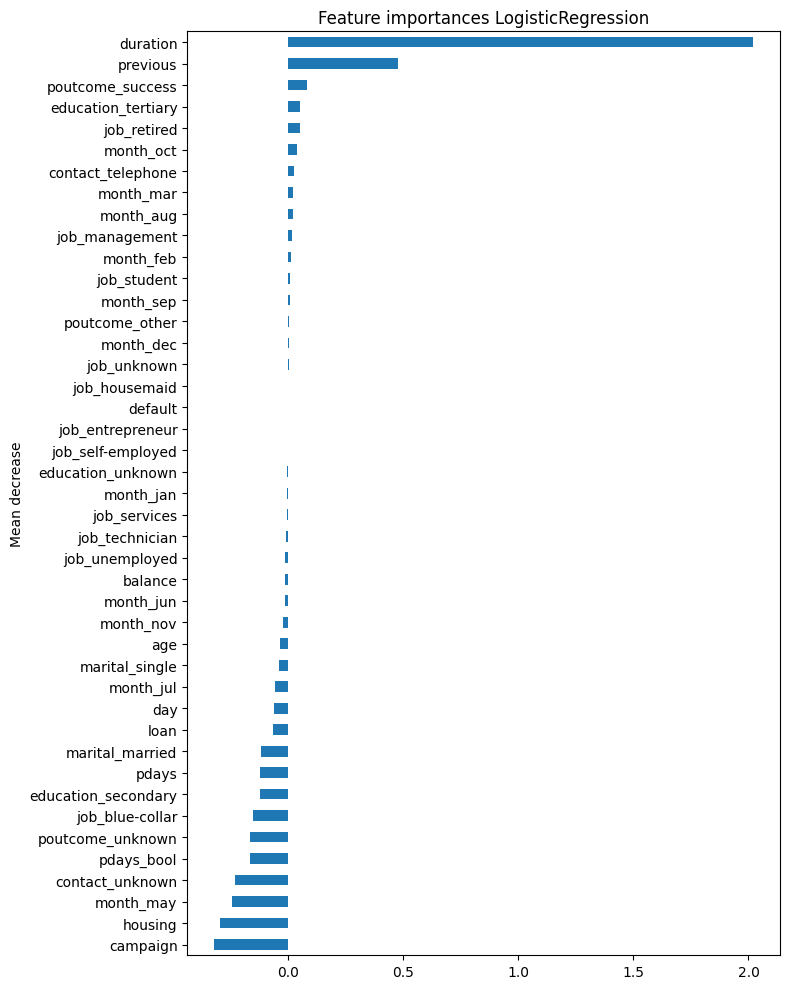

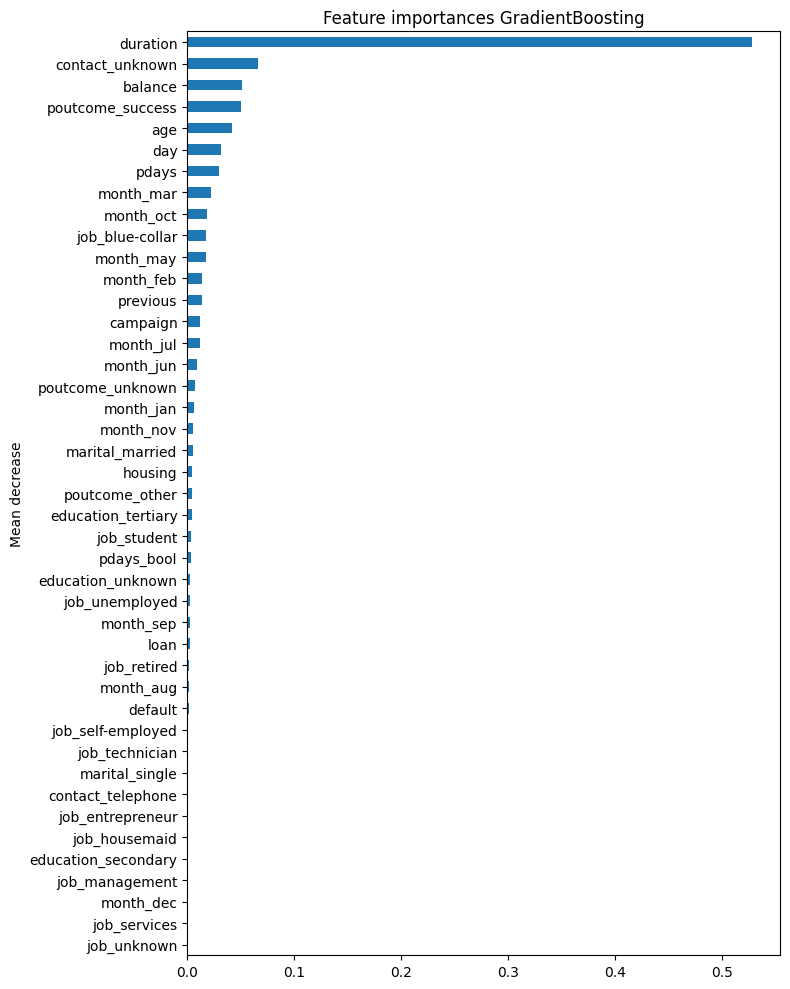

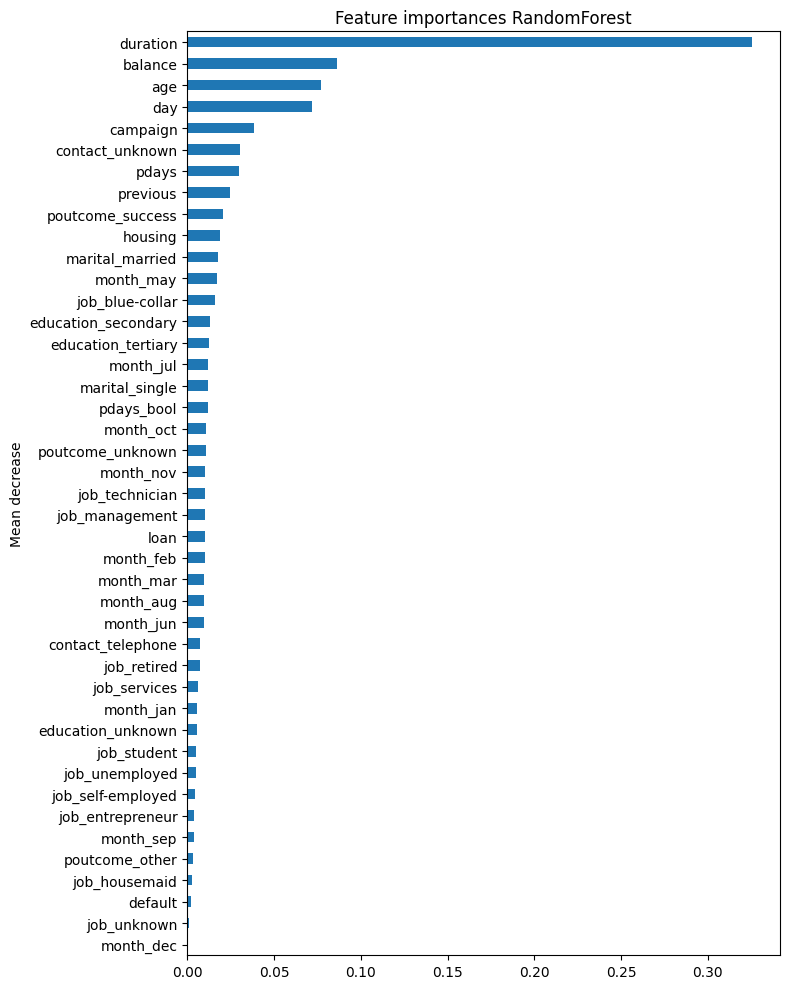

In [44]:
#Output the average significance for each model
for k,v in importanies_dict.items():
    importances = pd.Series(v, index=X.columns)

   
    #Sorting
    importances = importances.sort_values(ascending=True)

   
    #Display the graph
    fig, ax = plt.subplots(figsize=(8,10))
    importances.plot.barh(ax=ax)
    ax.set_title("Feature importances {}".format(k))
    ax.set_ylabel("Mean decrease")
    fig.tight_layout()
    plt.show()

In [45]:
#Allows you to resize a table function (as for cv2.resize only for 1d array)

def resize(arr,size):
    new_arr = []
    shape_arr = arr.shape[0]
    for i in range(1,size):
        idx = int(i/size*shape_arr)
        value = arr[idx]
        new_arr.append(value)
    return np.array(new_arr)

In [46]:
#Make a resize

TPR = {k:[resize(i,300) for i in v] for k,v in TPR.items()}
FPR = {k:[resize(i,300) for i in v] for k,v in FPR.items()}

In [47]:
#Averaging the ROC curves and finding deviations
stack_TPR = {k:np.vstack(v) for k,v in TPR.items()}
m_TPR = {k:np.mean(v,axis=0) for k,v in stack_TPR.items()}
std_TPR = {k:np.std(v,axis=0) for k,v in stack_TPR.items()}

stack_FPR = {k:np.vstack(v) for k,v in FPR.items()}
m_FPR = {k:np.mean(v,axis=0) for k,v in stack_FPR.items()}
std_FPR = {k:np.std(v,axis=0) for k,v in stack_FPR.items()}

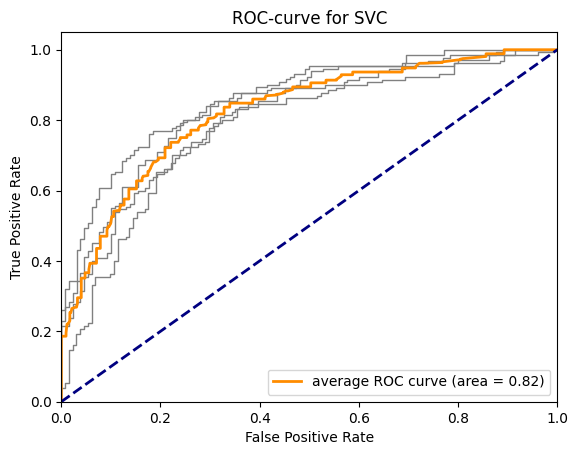

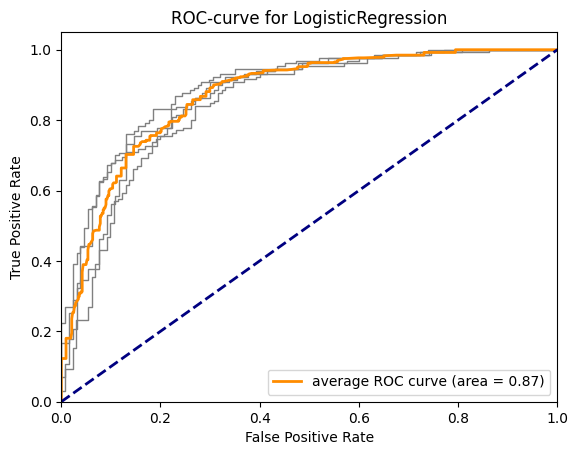

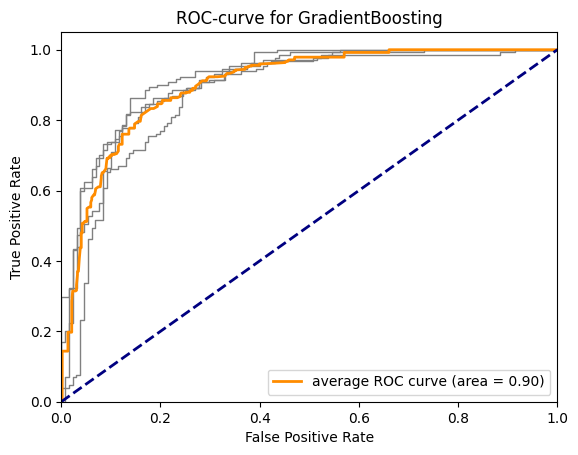

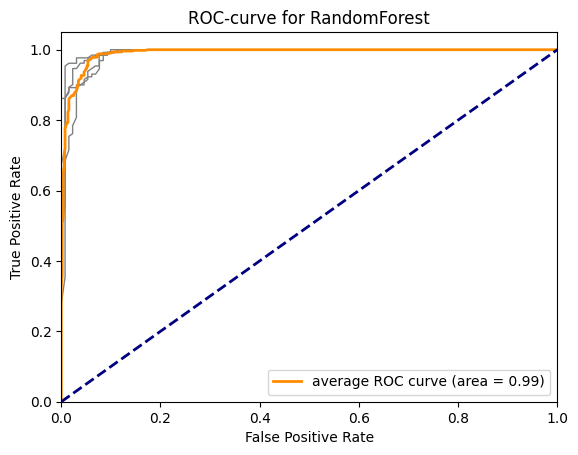

In [48]:
#Sorting through the models

for k in m_TPR.keys():
    tpr = TPR[k]
    fpr = FPR[k]
    
    m_fpr = m_FPR[k]
    m_tpr = m_TPR[k]
    m_roc_auc = auc(m_fpr, m_tpr)
    
    #Строим ROC-кривую
    #Building the ROC curve
    plt.figure()
    lw = 2
    
    #Добавляем полученные кривые
    #Adding the resulting curves
    for i in range(len(tpr)):
        plt.plot(fpr[i], tpr[i], color='grey',lw=1)
    
    #Средняя ROC-кривая
    #Average ROC curve
    plt.plot(m_fpr, m_tpr, color='darkorange',lw=lw, label='average ROC curve (area = %0.2f)' % m_roc_auc)
    
    #Случайный бинарный генератор с равномерным распределением
    #Random binary generator with uniform distribution
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve for {}'.format(k))
    plt.legend(loc="lower right")
    plt.show()

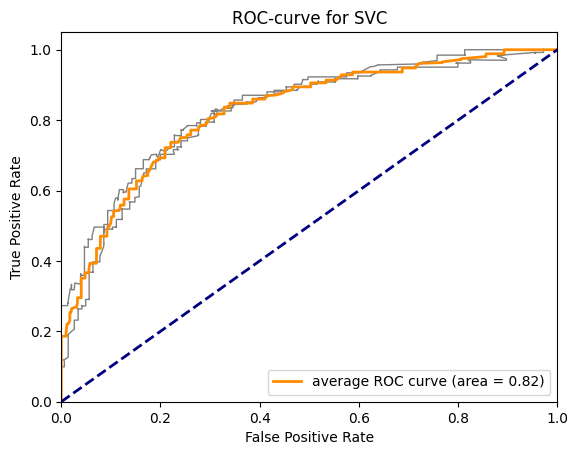

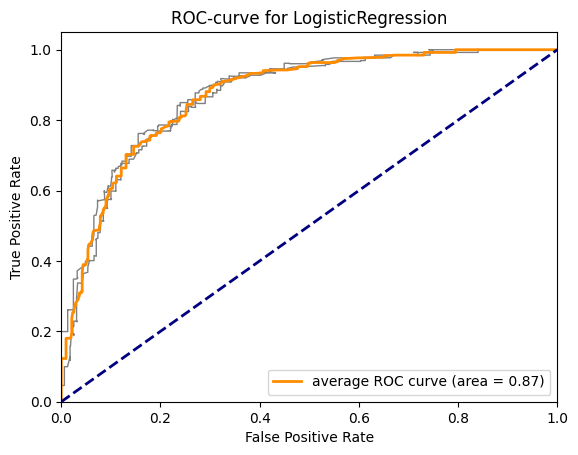

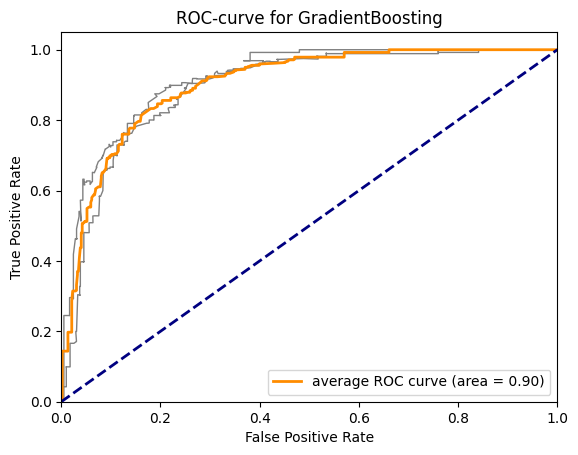

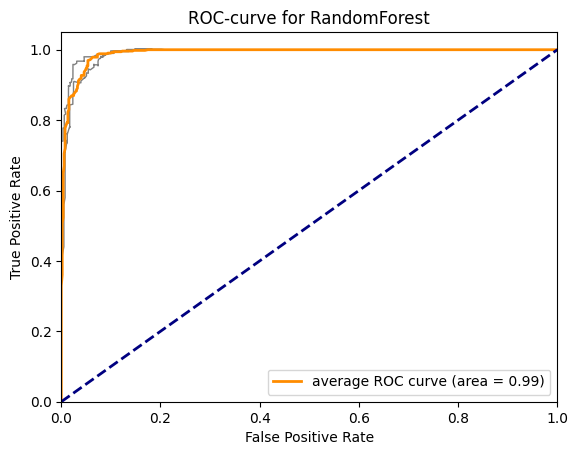

In [49]:
#Sorting through the models
for k in m_TPR.keys():
    
    m_fpr = m_FPR[k]
    m_tpr = m_TPR[k]
    std_fpr = std_FPR[k]
    std_tpr = std_TPR[k]
    m_roc_auc = auc(m_fpr, m_tpr)
    
    #Строим ROC-кривую
    #Building the ROC curve
    plt.figure()
    lw = 2
    
    #Добвялем средние кривые сдвинутые на величину стандартного отклонения
    #Adding average curves shifted by the value of the standard deviation
    plt.plot(m_fpr-std_fpr, m_tpr-std_tpr, color='grey',lw=1)
    plt.plot(m_fpr+std_fpr, m_tpr+std_tpr, color='grey',lw=1)
    
    #Средняя
    #Average
    plt.plot(m_fpr, m_tpr, color='darkorange',lw=lw, label='average ROC curve (area = %0.2f)' % m_roc_auc)
    
    #Случайный бинарный генератор с равномерным распределением
    #Random binary generator with uniform distribution
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve for {}'.format(k))
    plt.legend(loc="lower right")
    plt.show()

In [50]:
X = X.values

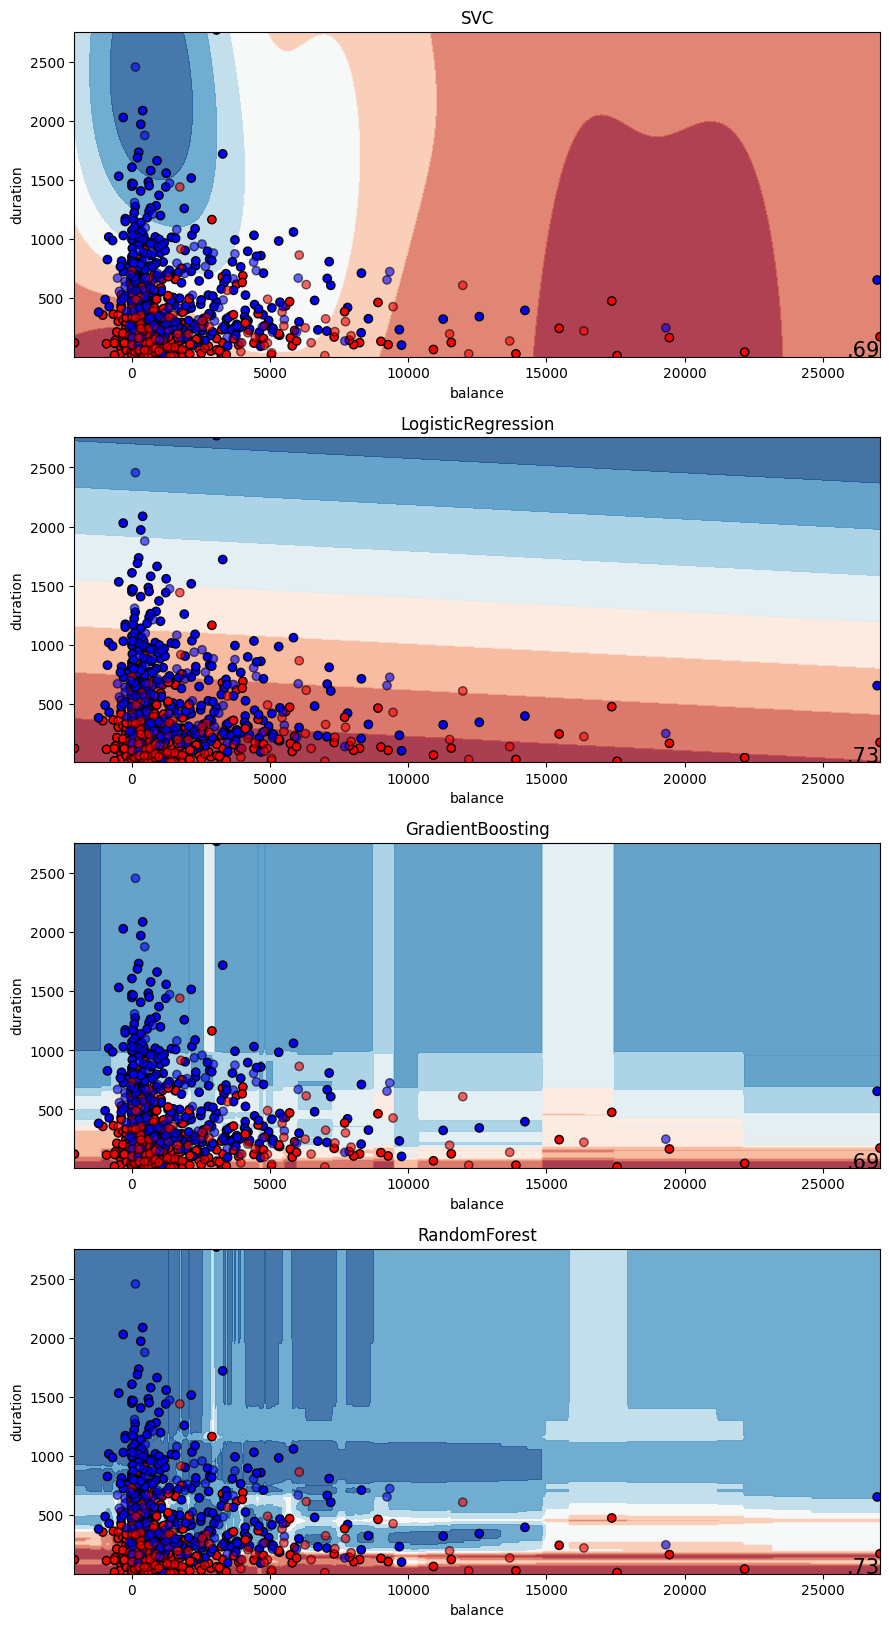

In [51]:
h = 50
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
names = [
    "SVC",
    "LogisticRegression",
    "GradientBoosting",
    "RandomForest",
]

#Классификаторы
#Classifiers
classifiers = [
    SVC(random_state=42),
    LogisticRegression(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]


figure = plt.figure(figsize=(9, 20))
i = 1

#Перебираем классификаторы
#Sorting through classifiers
for name, clf in zip(names, classifiers):
    
    x_min, x_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
    y_min, y_max = X[:, 6].min() - 0.5, X[:, 6].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    ax = plt.subplot(len(classifiers) + 1, 1, i)
    
    clf = clf.fit(X_train.values[:, [2,6]],y_train)
    score = clf.score(X_test.values[:, [2,6]], y_test)

    #Строим решающие области
    #Building crucial areas
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    #Тренировочные наблюдения
    #Training observations
    ax.scatter(
        X_train.values[:, 2], X_train.values[:, 6], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    #Тестовые наблюдения
    #Test observations
    ax.scatter(
        X_test.values[:, 2],
        X_test.values[:, 6],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    ax.set_xlabel('balance')
    ax.set_ylabel('duration')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(name)
    ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
    i += 1

plt.tight_layout()
plt.show()

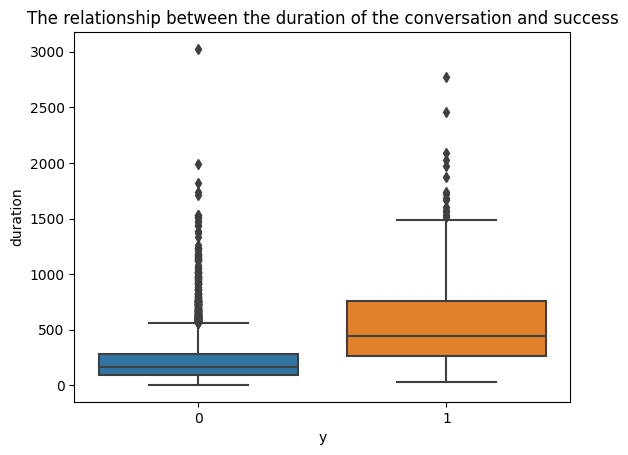

In [52]:
sns.boxplot(x="y", y="duration", data=df)
plt.title('The relationship between the duration of the conversation and success')
plt.show()